In [3]:
import pandas as pd
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
import cufflinks as cf
from fbprophet import Prophet


In [4]:
pyo.init_notebook_mode(connected=True) # connect to jupyter notebook
cf.go_offline() # we can use them offline


In [5]:
df=pd.read_excel(r"D:\python\Datasets\Covid cases in India.xlsx") # read the excel file where df stands for dataframe

In [6]:
df = pd.read_csv(r'D:\python\Datasets\covid_19_data.csv',parse_dates=['Last Update'])
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)
df_confirmed = pd.read_csv(r"D:\python\Datasets\time_series_covid_19_confirmed.csv")
df_recovered = pd.read_csv(r"D:\python\Datasets\time_series_covid_19_recovered.csv")
df_deaths = pd.read_csv(r"D:\python\Datasets\time_series_covid_19_deaths.csv")
df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)


In [7]:
df.groupby('Date').sum().head()
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()

In [8]:
confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [9]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
56,2020-03-18
57,2020-03-19
58,2020-03-20
59,2020-03-21
60,2020-03-22


In [10]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
56,2020-03-18,148703.893313,133406.901295,163862.558040
57,2020-03-19,152585.478705,136719.540166,167388.848414
58,2020-03-20,157365.812683,141112.189700,172299.004029
59,2020-03-21,161049.269158,146875.317753,175582.785861
60,2020-03-22,165066.852886,149254.317890,179850.520778


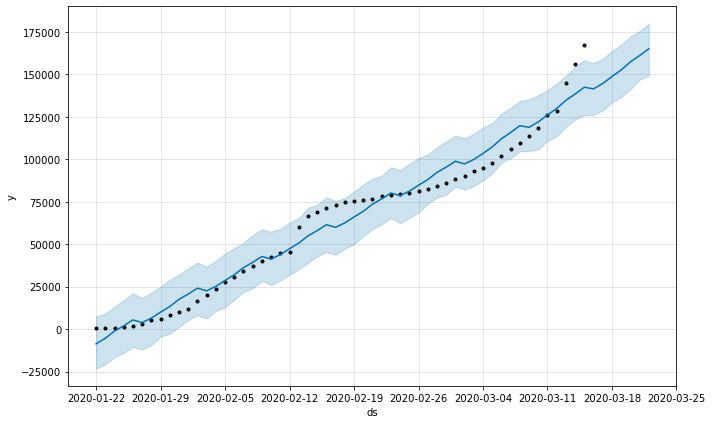

In [11]:
confirmed_forecast_plot = m.plot(forecast)

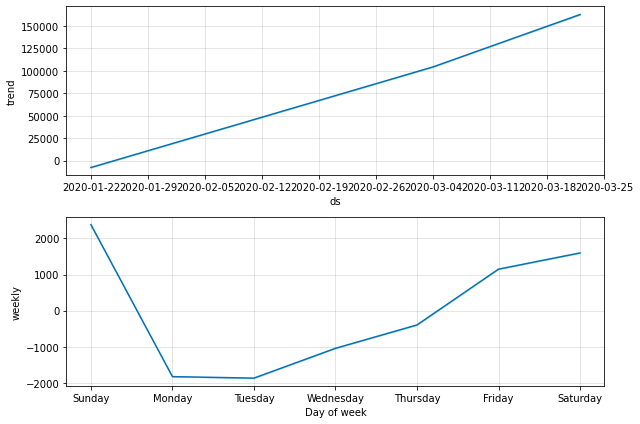

In [12]:

confirmed_forecast_plot =m.plot_components(forecast)

In [13]:
deaths = df.groupby('Date').sum()['Deaths'].reset_index()

In [14]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [15]:
m = Prophet(interval_width=0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
56,2020-03-18
57,2020-03-19
58,2020-03-20
59,2020-03-21
60,2020-03-22


In [16]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
56,2020-03-18,6138.426077,5719.057873,6557.846969
57,2020-03-19,6317.279964,5921.065126,6735.920030
58,2020-03-20,6547.994985,6170.030892,6968.980367
59,2020-03-21,6770.710027,6370.559719,7189.723886
60,2020-03-22,7011.342323,6607.949234,7432.090289


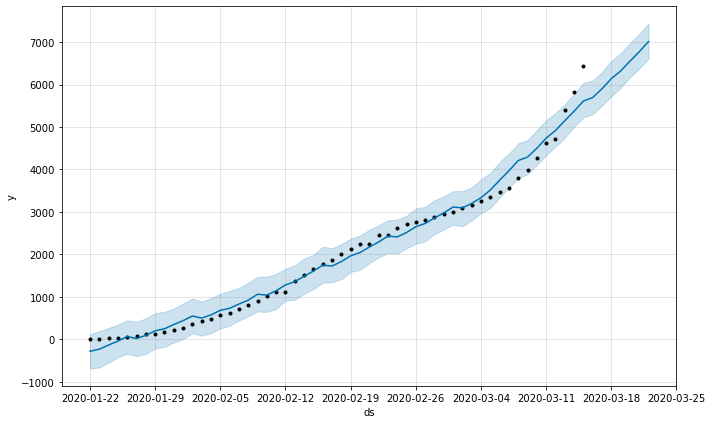

In [17]:
deaths_forecast_plot = m.plot(forecast)

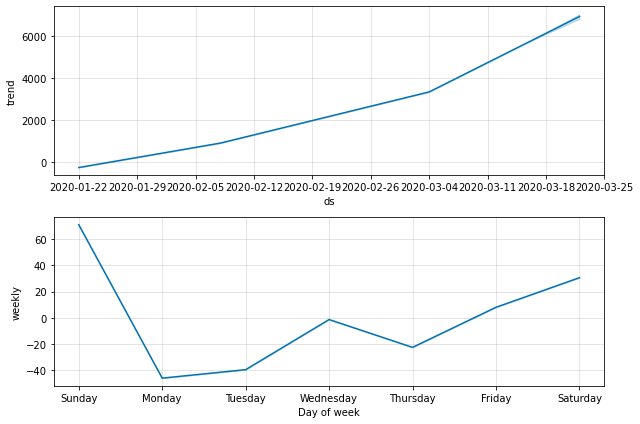

In [18]:
deaths_forecast_plot = m.plot_components(forecast)